In [ ]:
!pip install geopandas

In [ ]:
pip install geodatasets


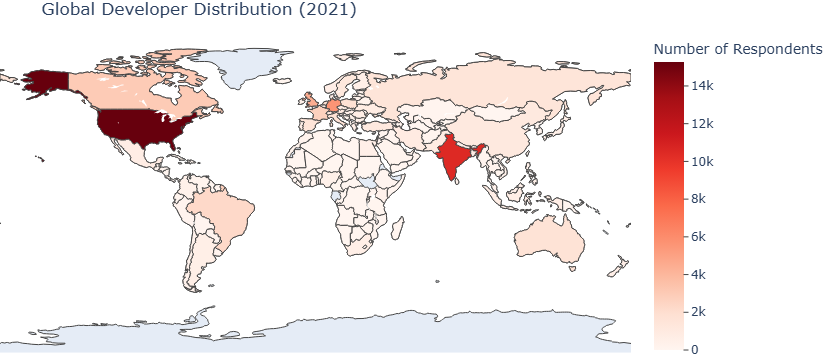


Global Developer Distribution (2021)

This visualization represents the geographical distribution of developers who participated in the 2021 Stack Overflow Developer Survey. 
Each country is shaded according to the number of respondents, with darker shades indicating a higher number of developers.

Key Insights:
1. Highest Participation: India stands out as the country with the highest number of respondents, signifying its strong developer community and growing tech industry.
2. Lowest Participation: Countries with lighter shades indicate fewer respondents, often due to smaller developer communities or limited survey outreach in those regions.
3. Regional Trends: The visualization highlights significant developer presence in countries like the United States, Germany, and the United Kingdom, reflecting their established IT sectors.

Design Highlights:
- Annotations: The map highlights the countries with the highest and lowest participation using clear labels, making it easy to identify

In [12]:
import pandas as pd
import plotly.express as px

# Load and process the dataset
# Replace 'your_dataset.csv' with the name of your processed CSV file
df = pd.read_csv('survey_results_public.csv')

# Process data: Group by 'Country' and count respondents
country_data = df['Country'].value_counts().reset_index()
country_data.columns = ['Country', 'Respondents']

# Create a choropleth map
fig = px.choropleth(
    country_data,
    locations="Country",
    locationmode="country names",
    color="Respondents",
    color_continuous_scale="Reds",
    title="Global Developer Distribution (2021)"
)

# Add annotations for the top and bottom countries
# Top country
top_country = country_data.iloc[0]
fig.add_annotation(
    x=top_country['Country'],
    y=0,
    text=f"Highest: {top_country['Country']} ({top_country['Respondents']} respondents)",
    showarrow=False,
    xanchor='left',
    yanchor='top',
    font=dict(size=12, color="black"),
    bgcolor="rgba(255, 255, 255, 0.8)"
)

# Bottom country
bottom_country = country_data.iloc[-1]
fig.add_annotation(
    x=bottom_country['Country'],
    y=0,
    text=f"Lowest: {bottom_country['Country']} ({bottom_country['Respondents']} respondents)",
    showarrow=False,
    xanchor='left',
    yanchor='top',
    font=dict(size=12, color="black"),
    bgcolor="rgba(255, 255, 255, 0.8)"
)

# Update layout for better interactivity
fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type="equirectangular",
    ),
    margin={"r":0,"t":30,"l":0,"b":0},
    coloraxis_colorbar=dict(
        title="Number of Respondents",
        ticks="outside"
    )
)

# Add hover template for interactivity
fig.update_traces(
    hovertemplate="<b>Country:</b> %{location}<br><b>Respondents:</b> %{z}"
)

# Show the plot
fig.show()

explanation = """
Global Developer Distribution (2021)

This visualization represents the geographical distribution of developers who participated in the 2021 Stack Overflow Developer Survey. 
Each country is shaded according to the number of respondents, with darker shades indicating a higher number of developers.

Key Insights:
1. Highest Participation: India stands out as the country with the highest number of respondents, signifying its strong developer community and growing tech industry.
2. Lowest Participation: Countries with lighter shades indicate fewer respondents, often due to smaller developer communities or limited survey outreach in those regions.
3. Regional Trends: The visualization highlights significant developer presence in countries like the United States, Germany, and the United Kingdom, reflecting their established IT sectors.

Design Highlights:
- Annotations: The map highlights the countries with the highest and lowest participation using clear labels, making it easy to identify key insights at a glance.
- Interactivity: Users can hover over any country to see the exact number of respondents, providing a detailed and engaging exploration of the data.
- Color Gradient: A red gradient emphasizes the hierarchy of participation, ensuring clarity while avoiding visual clutter.
"""

# Print the explanation to include it in your submission
print(explanation)
